In [1]:
# Standard stuff
import numpy as np                              #For almost everything
import matplotlib.pyplot as plt                 #For plotting
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf

#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                           
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
#********************************************************************************************************
cList = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
                 '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
                 '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000',
                 '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080',
                 '#ffffff', '#000000']
lsList = ['-','--','-.',':']
figlist=[]

In [2]:
import os
def stichSpectrum(fileroot):
    datadir = fileroot[0:fileroot.rfind('/')]
    filename= fileroot[fileroot.rfind('/')+1:]
    cp = os.getcwd()
    os.chdir(datadir)
    fl =os.listdir(datadir)
    data={}
    nameStop = []
    for fn in fl:
        if fn.find(filename) is not -1:
            if fn.find('.txt') is not -1:
                data[fn] = np.loadtxt(fn)
                nameStop += [ [fn, data[fn][-1,0] ] ]
    ascList = []
    for ii in range(len(nameStop)):
        if len(ascList)==0:
            ascList += [nameStop[ii]]
        else:
            flag=0
            for jj in range(len(ascList)):
                if ascList[jj][1]>nameStop[ii][1]:
                    ascList.insert(jj,nameStop[ii])
                    flag=1
                    break
            if flag==0:
                ascList.append(nameStop[ii])
    ff = data[ascList[0][0]][:,0]
    spec = data[ascList[0][0]][:,1]
    for ii in range(1,len(ascList),1):
        temp = data[ascList[ii][0]]
        for jj in range(len(temp[:,0])):
            if temp[jj,0]>ff[-1]:
                break
        ff = np.concatenate((ff,temp[jj:,0]))
        spec = np.concatenate((spec,temp[jj:,1]))
    os.chdir(cp)
    return ff,spec

In [3]:
ff, M539_24_500 = stichSpectrum('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190117_Marconi_PLL_Noise/Marconi539_24MHz_500Hz_')
ff, M539_24_1k = stichSpectrum('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190117_Marconi_PLL_Noise/Marconi539_24MHz_1kHz_')
ff, M539_24_5k = stichSpectrum('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190117_Marconi_PLL_Noise/Marconi539_24MHz_5kHz_')
ff, M539_24_10k = stichSpectrum('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190117_Marconi_PLL_Noise/Marconi539_24MHz_10kHz_')
ff, MBD9020_24_500 = stichSpectrum('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190117_Marconi_PLL_Noise/MarconiBD9020_24MHz_500Hz_')
ff, MBD9020_24_1k = stichSpectrum('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190117_Marconi_PLL_Noise/MarconiBD9020_24MHz_1kHz_')
ff, MBD9020_24_5k = stichSpectrum('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190117_Marconi_PLL_Noise/MarconiBD9020_24MHz_5kHz_')
ff, MBD9020_24_10k = stichSpectrum('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190117_Marconi_PLL_Noise/MarconiBD9020_24MHz_10kHz_')
ff, M539_48_500 = stichSpectrum('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190117_Marconi_PLL_Noise/Marconi539_48MHz_500Hz_')
ff, M539_48_1k = stichSpectrum('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190117_Marconi_PLL_Noise/Marconi539_48MHz_1kHz_')
ff, M539_48_5k = stichSpectrum('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190117_Marconi_PLL_Noise/Marconi539_48MHz_5kHz_')
ff, M539_48_10k = stichSpectrum('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190117_Marconi_PLL_Noise/Marconi539_48MHz_10kHz_')
ff, MBD9020_48_500 = stichSpectrum('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190117_Marconi_PLL_Noise/MarconiBD9020_48MHz_500Hz_')
ff, MBD9020_48_1k = stichSpectrum('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190117_Marconi_PLL_Noise/MarconiBD9020_48MHz_1kHz_')
ff, MBD9020_48_5k = stichSpectrum('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190117_Marconi_PLL_Noise/MarconiBD9020_48MHz_5kHz_')
ff, MBD9020_48_10k = stichSpectrum('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190117_Marconi_PLL_Noise/MarconiBD9020_48MHz_10kHz_')

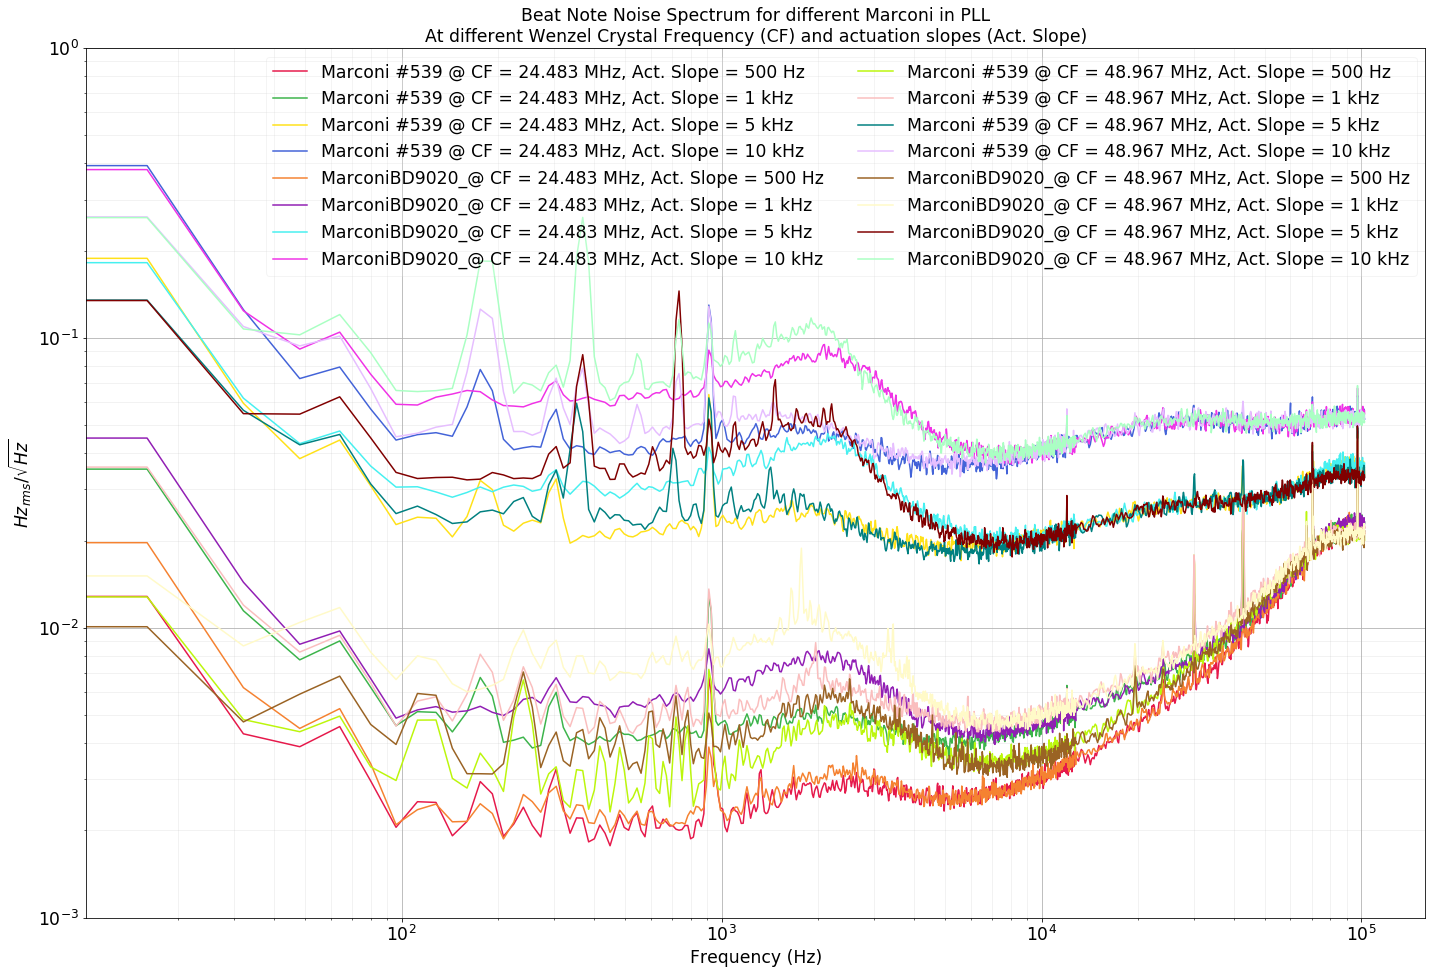

In [4]:
fig1 = plt.figure(figsize=[24,16])
plt.loglog(ff, M539_24_500*500, label = 'Marconi #539 @ CF = 24.483 MHz, Act. Slope = 500 Hz', ls=lsList[0],c=cList[0])
plt.loglog(ff, M539_24_1k*1e3, label = 'Marconi #539 @ CF = 24.483 MHz, Act. Slope = 1 kHz', ls=lsList[0],c=cList[1])
plt.loglog(ff, M539_24_5k*5e3, label = 'Marconi #539 @ CF = 24.483 MHz, Act. Slope = 5 kHz', ls=lsList[0],c=cList[2])
plt.loglog(ff, M539_24_10k*1e4, label = 'Marconi #539 @ CF = 24.483 MHz, Act. Slope = 10 kHz', ls=lsList[0],c=cList[3])
plt.loglog(ff, MBD9020_24_500*500, label = 'MarconiBD9020_@ CF = 24.483 MHz, Act. Slope = 500 Hz', ls=lsList[0],c=cList[4])
plt.loglog(ff, MBD9020_24_1k*1e3, label = 'MarconiBD9020_@ CF = 24.483 MHz, Act. Slope = 1 kHz', ls=lsList[0],c=cList[5])
plt.loglog(ff, MBD9020_24_5k*5e3, label = 'MarconiBD9020_@ CF = 24.483 MHz, Act. Slope = 5 kHz', ls=lsList[0],c=cList[6])
plt.loglog(ff, MBD9020_24_10k*1e4, label = 'MarconiBD9020_@ CF = 24.483 MHz, Act. Slope = 10 kHz', ls=lsList[0],c=cList[7])
plt.loglog(ff, M539_48_500*500, label = 'Marconi #539 @ CF = 48.967 MHz, Act. Slope = 500 Hz', ls=lsList[0],c=cList[8])
plt.loglog(ff, M539_48_1k*1e3, label = 'Marconi #539 @ CF = 48.967 MHz, Act. Slope = 1 kHz', ls=lsList[0],c=cList[9])
plt.loglog(ff, M539_48_5k*5e3, label = 'Marconi #539 @ CF = 48.967 MHz, Act. Slope = 5 kHz', ls=lsList[0],c=cList[10])
plt.loglog(ff, M539_48_10k*1e4, label = 'Marconi #539 @ CF = 48.967 MHz, Act. Slope = 10 kHz', ls=lsList[0],c=cList[11])
plt.loglog(ff, MBD9020_48_500*500, label = 'MarconiBD9020_@ CF = 48.967 MHz, Act. Slope = 500 Hz', ls=lsList[0],c=cList[12])
plt.loglog(ff, MBD9020_48_1k*1e3, label = 'MarconiBD9020_@ CF = 48.967 MHz, Act. Slope = 1 kHz', ls=lsList[0],c=cList[13])
plt.loglog(ff, MBD9020_48_5k*5e3, label = 'MarconiBD9020_@ CF = 48.967 MHz, Act. Slope = 5 kHz', ls=lsList[0],c=cList[14])
plt.loglog(ff, MBD9020_48_10k*1e4, label = 'MarconiBD9020_@ CF = 48.967 MHz, Act. Slope = 10 kHz', ls=lsList[0],c=cList[15])
fig1.gca().legend(loc=1,ncol=2,framealpha=0.2)
fig1.gca().set_title('Beat Note Noise Spectrum for different Marconi in PLL\nAt different Wenzel Crystal Frequency (CF) and actuation slopes (Act. Slope)')
fig1.gca().set_ylabel(r'$Hz_{rms}/\sqrt{Hz}$')
fig1.gca().set_xlabel('Frequency (Hz)')
fig1.gca().set_ylim((1e-3,1))
fig1.gca().grid('on', which='both')
fig1.gca().grid(alpha=0.2, which='minor')
figlist +=[fig1]

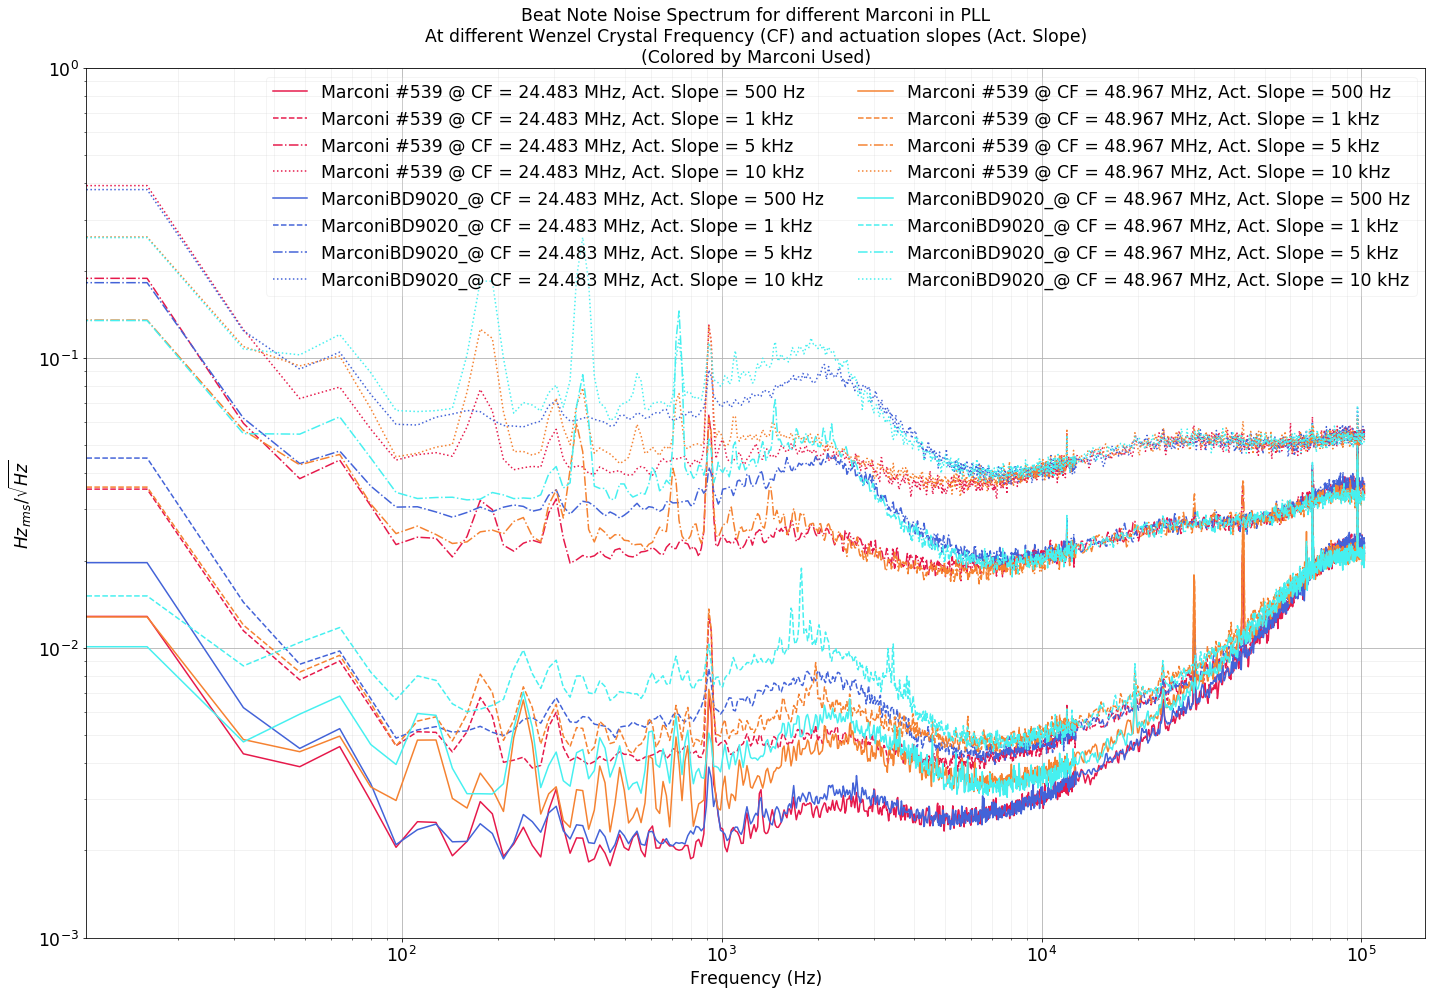

In [5]:
fig2 = plt.figure(figsize=[24,16])
plt.loglog(ff, M539_24_500*500, label = 'Marconi #539 @ CF = 24.483 MHz, Act. Slope = 500 Hz', ls=lsList[0],c=cList[0])
plt.loglog(ff, M539_24_1k*1e3, label = 'Marconi #539 @ CF = 24.483 MHz, Act. Slope = 1 kHz', ls=lsList[1],c=cList[0])
plt.loglog(ff, M539_24_5k*5e3, label = 'Marconi #539 @ CF = 24.483 MHz, Act. Slope = 5 kHz', ls=lsList[2],c=cList[0])
plt.loglog(ff, M539_24_10k*1e4, label = 'Marconi #539 @ CF = 24.483 MHz, Act. Slope = 10 kHz', ls=lsList[3],c=cList[0])
plt.loglog(ff, MBD9020_24_500*500, label = 'MarconiBD9020_@ CF = 24.483 MHz, Act. Slope = 500 Hz', ls=lsList[0],c=cList[3])
plt.loglog(ff, MBD9020_24_1k*1e3, label = 'MarconiBD9020_@ CF = 24.483 MHz, Act. Slope = 1 kHz', ls=lsList[1],c=cList[3])
plt.loglog(ff, MBD9020_24_5k*5e3, label = 'MarconiBD9020_@ CF = 24.483 MHz, Act. Slope = 5 kHz', ls=lsList[2],c=cList[3])
plt.loglog(ff, MBD9020_24_10k*1e4, label = 'MarconiBD9020_@ CF = 24.483 MHz, Act. Slope = 10 kHz', ls=lsList[3],c=cList[3])
plt.loglog(ff, M539_48_500*500, label = 'Marconi #539 @ CF = 48.967 MHz, Act. Slope = 500 Hz', ls=lsList[0],c=cList[4])
plt.loglog(ff, M539_48_1k*1e3, label = 'Marconi #539 @ CF = 48.967 MHz, Act. Slope = 1 kHz', ls=lsList[1],c=cList[4])
plt.loglog(ff, M539_48_5k*5e3, label = 'Marconi #539 @ CF = 48.967 MHz, Act. Slope = 5 kHz', ls=lsList[2],c=cList[4])
plt.loglog(ff, M539_48_10k*1e4, label = 'Marconi #539 @ CF = 48.967 MHz, Act. Slope = 10 kHz', ls=lsList[3],c=cList[4])
plt.loglog(ff, MBD9020_48_500*500, label = 'MarconiBD9020_@ CF = 48.967 MHz, Act. Slope = 500 Hz', ls=lsList[0],c=cList[6])
plt.loglog(ff, MBD9020_48_1k*1e3, label = 'MarconiBD9020_@ CF = 48.967 MHz, Act. Slope = 1 kHz', ls=lsList[1],c=cList[6])
plt.loglog(ff, MBD9020_48_5k*5e3, label = 'MarconiBD9020_@ CF = 48.967 MHz, Act. Slope = 5 kHz', ls=lsList[2],c=cList[6])
plt.loglog(ff, MBD9020_48_10k*1e4, label = 'MarconiBD9020_@ CF = 48.967 MHz, Act. Slope = 10 kHz', ls=lsList[3],c=cList[6])
fig2.gca().legend(loc=1,ncol=2,framealpha=0.2)
fig2.gca().set_title('Beat Note Noise Spectrum for different Marconi in PLL\nAt different Wenzel Crystal Frequency (CF) and actuation slopes (Act. Slope)\n(Colored by Marconi Used)')
fig2.gca().set_ylabel(r'$Hz_{rms}/\sqrt{Hz}$')
fig2.gca().set_xlabel('Frequency (Hz)')
fig2.gca().set_ylim((1e-3,1))
fig2.gca().grid('on', which='both')
fig2.gca().grid(alpha=0.2, which='minor')
figlist +=[fig2]

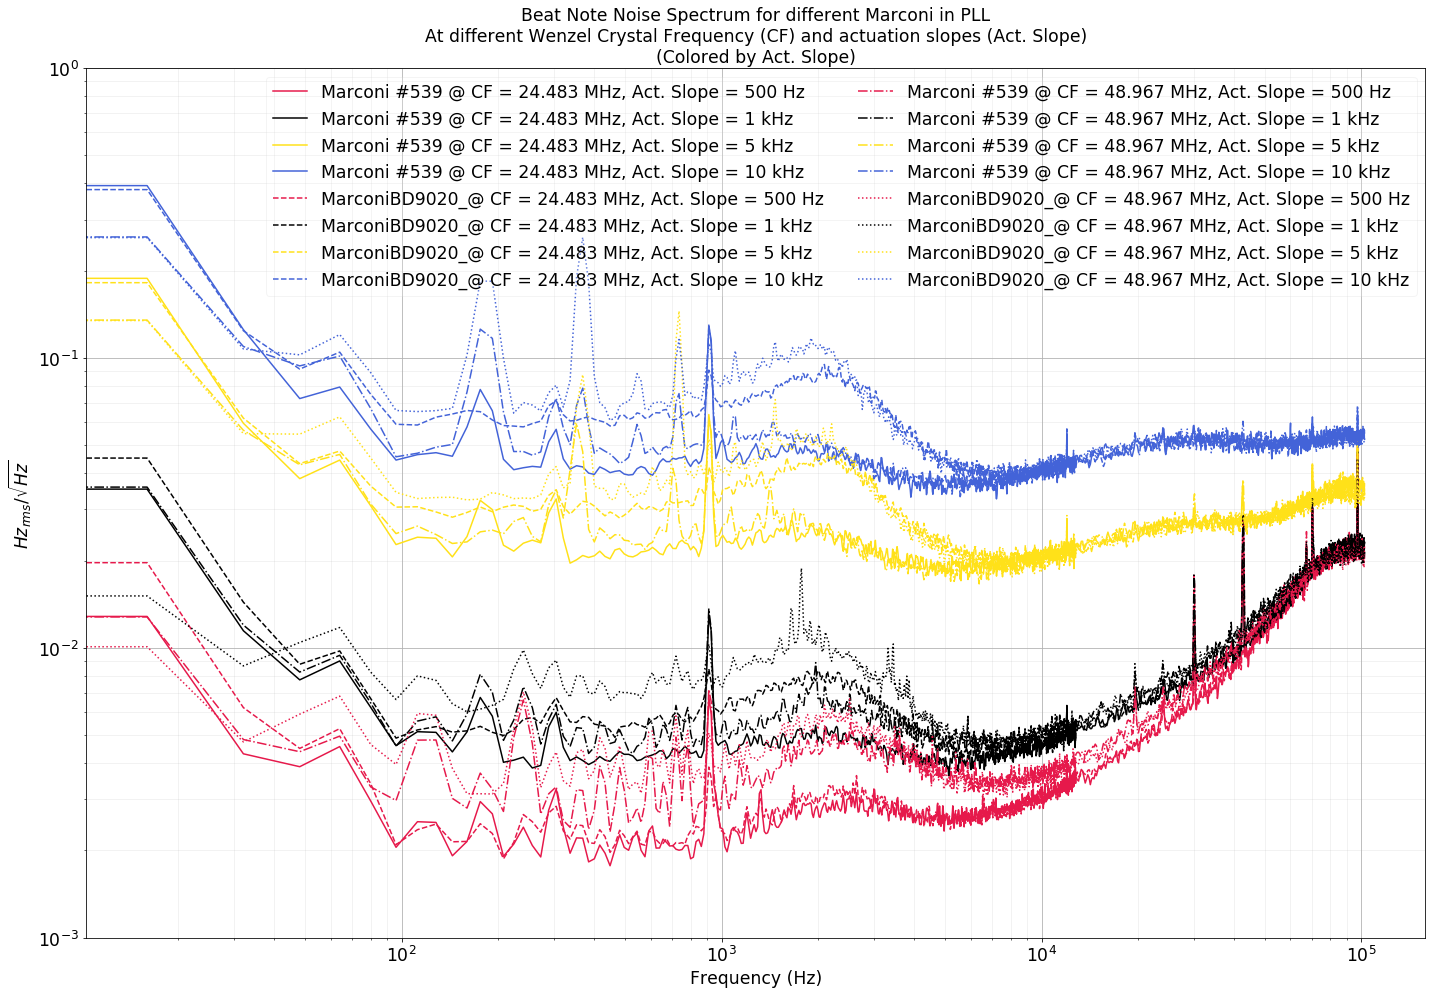

In [6]:
fig3 = plt.figure(figsize=[24,16])
plt.loglog(ff, M539_24_500*500, label = 'Marconi #539 @ CF = 24.483 MHz, Act. Slope = 500 Hz', ls=lsList[0],c=cList[0])
plt.loglog(ff, M539_24_1k*1e3, label = 'Marconi #539 @ CF = 24.483 MHz, Act. Slope = 1 kHz', ls=lsList[0],c=cList[-1])
plt.loglog(ff, M539_24_5k*5e3, label = 'Marconi #539 @ CF = 24.483 MHz, Act. Slope = 5 kHz', ls=lsList[0],c=cList[2])
plt.loglog(ff, M539_24_10k*1e4, label = 'Marconi #539 @ CF = 24.483 MHz, Act. Slope = 10 kHz', ls=lsList[0],c=cList[3])
plt.loglog(ff, MBD9020_24_500*500, label = 'MarconiBD9020_@ CF = 24.483 MHz, Act. Slope = 500 Hz', ls=lsList[1],c=cList[0])
plt.loglog(ff, MBD9020_24_1k*1e3, label = 'MarconiBD9020_@ CF = 24.483 MHz, Act. Slope = 1 kHz', ls=lsList[1],c=cList[-1])
plt.loglog(ff, MBD9020_24_5k*5e3, label = 'MarconiBD9020_@ CF = 24.483 MHz, Act. Slope = 5 kHz', ls=lsList[1],c=cList[2])
plt.loglog(ff, MBD9020_24_10k*1e4, label = 'MarconiBD9020_@ CF = 24.483 MHz, Act. Slope = 10 kHz', ls=lsList[1],c=cList[3])
plt.loglog(ff, M539_48_500*500, label = 'Marconi #539 @ CF = 48.967 MHz, Act. Slope = 500 Hz', ls=lsList[2],c=cList[0])
plt.loglog(ff, M539_48_1k*1e3, label = 'Marconi #539 @ CF = 48.967 MHz, Act. Slope = 1 kHz', ls=lsList[2],c=cList[-1])
plt.loglog(ff, M539_48_5k*5e3, label = 'Marconi #539 @ CF = 48.967 MHz, Act. Slope = 5 kHz', ls=lsList[2],c=cList[2])
plt.loglog(ff, M539_48_10k*1e4, label = 'Marconi #539 @ CF = 48.967 MHz, Act. Slope = 10 kHz', ls=lsList[2],c=cList[3])
plt.loglog(ff, MBD9020_48_500*500, label = 'MarconiBD9020_@ CF = 48.967 MHz, Act. Slope = 500 Hz', ls=lsList[3],c=cList[0])
plt.loglog(ff, MBD9020_48_1k*1e3, label = 'MarconiBD9020_@ CF = 48.967 MHz, Act. Slope = 1 kHz', ls=lsList[3],c=cList[-1])
plt.loglog(ff, MBD9020_48_5k*5e3, label = 'MarconiBD9020_@ CF = 48.967 MHz, Act. Slope = 5 kHz', ls=lsList[3],c=cList[2])
plt.loglog(ff, MBD9020_48_10k*1e4, label = 'MarconiBD9020_@ CF = 48.967 MHz, Act. Slope = 10 kHz', ls=lsList[3],c=cList[3])
fig3.gca().legend(loc=1,ncol=2,framealpha=0.2)
fig3.gca().set_title('Beat Note Noise Spectrum for different Marconi in PLL\nAt different Wenzel Crystal Frequency (CF) and actuation slopes (Act. Slope)\n(Colored by Act. Slope)')
fig3.gca().set_ylabel(r'$Hz_{rms}/\sqrt{Hz}$')
fig3.gca().set_xlabel('Frequency (Hz)')
fig3.gca().set_ylim((1e-3,1))
fig3.gca().grid('on', which='both')
fig3.gca().grid(alpha=0.2, which='minor')
figlist +=[fig3]

In [19]:
M539_24_500_Data = np.zeros((len(ff),2))
M539_24_500_Data[:,0] = ff
M539_24_500_Data[:,1] = M539_24_500*500
np.savetxt('PLLOscNoise_500Hz.txt',M539_24_500_Data)

M539_24_1k_Data = np.zeros((len(ff),2))
M539_24_1k_Data[:,0] = ff
M539_24_1k_Data[:,1] = M539_24_1k*1e3
np.savetxt('PLLOscNoise_1kHz.txt',M539_24_1k_Data)

M539_24_5k_Data = np.zeros((len(ff),2))
M539_24_5k_Data[:,0] = ff
M539_24_5k_Data[:,1] = M539_24_5k*5e3
np.savetxt('PLLOscNoise_5kHz.txt',M539_24_5k_Data)

M539_24_10k_Data = np.zeros((len(ff),2))
M539_24_10k_Data[:,0] = ff
M539_24_10k_Data[:,1] = M539_24_10k*1e4
np.savetxt('PLLOscNoise_10kHz.txt',M539_24_10k_Data)

In [7]:
ffs = 10**(np.arange(0,5,0.1))
SR560InpNoise = np.concatenate(((42.0 - 3.8*np.arange(0,1,0.1))*1e-9, 4*np.arange(1,5,0.1) ))
SR560Noise = np.interp(ff,ffs,SR560InpNoise)*500e3
SR560Noise

array([2.10000000e-02, 2.40736255e+06, 3.00921412e+06, ...,
       9.80000000e+06, 9.80000000e+06, 9.80000000e+06])

In [8]:
#Not working
'''
M539_24_500MarcNoise = np.sqrt((M539_24_500*500)**2 - SR560Noise**2)
M539_24_1kMarcNoise = np.sqrt((M539_24_1k*1e3)**2 - SR560Noise**2)
M539_24_5kMarcNoise = np.sqrt((M539_24_5k*5e3)**2 - SR560Noise**2)
M539_24_10kMarcNoise = np.sqrt((M539_24_10k*10e3)**2 - SR560Noise**2)
MBD9020_24_500MarcNoise = np.sqrt((MBD9020_24_500*500)**2 - SR560Noise**2)
MBD9020_24_1kMarcNoise = np.sqrt((MBD9020_24_1k*1e3)**2 - SR560Noise**2)
MBD9020_24_5kMarcNoise = np.sqrt((MBD9020_24_5k*5e3)**2 - SR560Noise**2)
MBD9020_24_10kMarcNoise = np.sqrt((MBD9020_24_10k*10e3)**2 - SR560Noise**2)
M539_48_500MarcNoise = np.sqrt((M539_48_500*500)**2 - SR560Noise**2)
M539_48_1kMarcNoise = np.sqrt((M539_48_1k*1e3)**2 - SR560Noise**2)
M539_48_5kMarcNoise = np.sqrt((M539_48_5k*5e3)**2 - SR560Noise**2)
M539_48_10kMarcNoise = np.sqrt((M539_48_10k*10e3)**2 - SR560Noise**2)
MBD9020_48_500MarcNoise = np.sqrt((MBD9020_48_500*500)**2 - SR560Noise**2)
MBD9020_48_1kMarcNoise = np.sqrt((MBD9020_48_1k*1e3)**2 - SR560Noise**2)
MBD9020_48_5kMarcNoise = np.sqrt((MBD9020_48_5k*5e3)**2 - SR560Noise**2)
MBD9020_48_10kMarcNoise = np.sqrt((MBD9020_48_10k*10e3)**2 - SR560Noise**2)
'''

'\nM539_24_500MarcNoise = np.sqrt((M539_24_500*500)**2 - SR560Noise**2)\nM539_24_1kMarcNoise = np.sqrt((M539_24_1k*1e3)**2 - SR560Noise**2)\nM539_24_5kMarcNoise = np.sqrt((M539_24_5k*5e3)**2 - SR560Noise**2)\nM539_24_10kMarcNoise = np.sqrt((M539_24_10k*10e3)**2 - SR560Noise**2)\nMBD9020_24_500MarcNoise = np.sqrt((MBD9020_24_500*500)**2 - SR560Noise**2)\nMBD9020_24_1kMarcNoise = np.sqrt((MBD9020_24_1k*1e3)**2 - SR560Noise**2)\nMBD9020_24_5kMarcNoise = np.sqrt((MBD9020_24_5k*5e3)**2 - SR560Noise**2)\nMBD9020_24_10kMarcNoise = np.sqrt((MBD9020_24_10k*10e3)**2 - SR560Noise**2)\nM539_48_500MarcNoise = np.sqrt((M539_48_500*500)**2 - SR560Noise**2)\nM539_48_1kMarcNoise = np.sqrt((M539_48_1k*1e3)**2 - SR560Noise**2)\nM539_48_5kMarcNoise = np.sqrt((M539_48_5k*5e3)**2 - SR560Noise**2)\nM539_48_10kMarcNoise = np.sqrt((M539_48_10k*10e3)**2 - SR560Noise**2)\nMBD9020_48_500MarcNoise = np.sqrt((MBD9020_48_500*500)**2 - SR560Noise**2)\nMBD9020_48_1kMarcNoise = np.sqrt((MBD9020_48_1k*1e3)**2 - SR560Noi

In [9]:
'''
fig4 = plt.figure(figsize=[24,16])
plt.loglog(ff, M539_24_500MarcNoise, label = 'Marconi #539 @ CF = 24.483 MHz, Act. Slope = 500 Hz', ls=lsList[0],c=cList[0])
plt.loglog(ff, M539_24_1kMarcNoise, label = 'Marconi #539 @ CF = 24.483 MHz, Act. Slope = 1 kHz', ls=lsList[1],c=cList[0])
plt.loglog(ff, M539_24_5kMarcNoise, label = 'Marconi #539 @ CF = 24.483 MHz, Act. Slope = 5 kHz', ls=lsList[2],c=cList[0])
plt.loglog(ff, M539_24_10kMarcNoise, label = 'Marconi #539 @ CF = 24.483 MHz, Act. Slope = 10 kHz', ls=lsList[3],c=cList[0])
plt.loglog(ff, MBD9020_24_500MarcNoise, label = 'MarconiBD9020_@ CF = 24.483 MHz, Act. Slope = 500 Hz', ls=lsList[0],c=cList[3])
plt.loglog(ff, MBD9020_24_1kMarcNoise, label = 'MarconiBD9020_@ CF = 24.483 MHz, Act. Slope = 1 kHz', ls=lsList[1],c=cList[3])
plt.loglog(ff, MBD9020_24_5kMarcNoise, label = 'MarconiBD9020_@ CF = 24.483 MHz, Act. Slope = 5 kHz', ls=lsList[2],c=cList[3])
plt.loglog(ff, MBD9020_24_10kMarcNoise, label = 'MarconiBD9020_@ CF = 24.483 MHz, Act. Slope = 10 kHz', ls=lsList[3],c=cList[3])
plt.loglog(ff, M539_48_500MarcNoise, label = 'Marconi #539 @ CF = 48.967 MHz, Act. Slope = 500 Hz', ls=lsList[0],c=cList[4])
plt.loglog(ff, M539_48_1kMarcNoise, label = 'Marconi #539 @ CF = 48.967 MHz, Act. Slope = 1 kHz', ls=lsList[1],c=cList[4])
plt.loglog(ff, M539_48_5kMarcNoise, label = 'Marconi #539 @ CF = 48.967 MHz, Act. Slope = 5 kHz', ls=lsList[2],c=cList[4])
plt.loglog(ff, M539_48_10kMarcNoise, label = 'Marconi #539 @ CF = 48.967 MHz, Act. Slope = 10 kHz', ls=lsList[3],c=cList[4])
plt.loglog(ff, MBD9020_48_500MarcNoise, label = 'MarconiBD9020_@ CF = 48.967 MHz, Act. Slope = 500 Hz', ls=lsList[0],c=cList[6])
plt.loglog(ff, MBD9020_48_1kMarcNoise, label = 'MarconiBD9020_@ CF = 48.967 MHz, Act. Slope = 1 kHz', ls=lsList[1],c=cList[6])
plt.loglog(ff, MBD9020_48_5kMarcNoise, label = 'MarconiBD9020_@ CF = 48.967 MHz, Act. Slope = 5 kHz', ls=lsList[2],c=cList[6])
plt.loglog(ff, MBD9020_48_10kMarcNoise, label = 'MarconiBD9020_@ CF = 48.967 MHz, Act. Slope = 10 kHz', ls=lsList[3],c=cList[6])
fig4.gca().legend(loc=1,ncol=2,framealpha=0.2)
fig4.gca().set_title('Beat Note Noise Spectrum for different Marconi in PLL\nAt different Wenzel Crystal Frequency (CF) and actuation slopes (Act. Slope)\n(Colored by Marconi Used)')
fig4.gca().set_ylabel(r'$Hz_{rms}/\sqrt{Hz}$')
fig4.gca().set_xlabel('Frequency (Hz)')
fig4.gca().set_ylim((1e-3,1))
fig4.gca().grid('on', which='both')
fig4.gca().grid(alpha=0.2, which='minor')
figlist +=[fig4]
'''

"\nfig4 = plt.figure(figsize=[24,16])\nplt.loglog(ff, M539_24_500MarcNoise, label = 'Marconi #539 @ CF = 24.483 MHz, Act. Slope = 500 Hz', ls=lsList[0],c=cList[0])\nplt.loglog(ff, M539_24_1kMarcNoise, label = 'Marconi #539 @ CF = 24.483 MHz, Act. Slope = 1 kHz', ls=lsList[1],c=cList[0])\nplt.loglog(ff, M539_24_5kMarcNoise, label = 'Marconi #539 @ CF = 24.483 MHz, Act. Slope = 5 kHz', ls=lsList[2],c=cList[0])\nplt.loglog(ff, M539_24_10kMarcNoise, label = 'Marconi #539 @ CF = 24.483 MHz, Act. Slope = 10 kHz', ls=lsList[3],c=cList[0])\nplt.loglog(ff, MBD9020_24_500MarcNoise, label = 'MarconiBD9020_@ CF = 24.483 MHz, Act. Slope = 500 Hz', ls=lsList[0],c=cList[3])\nplt.loglog(ff, MBD9020_24_1kMarcNoise, label = 'MarconiBD9020_@ CF = 24.483 MHz, Act. Slope = 1 kHz', ls=lsList[1],c=cList[3])\nplt.loglog(ff, MBD9020_24_5kMarcNoise, label = 'MarconiBD9020_@ CF = 24.483 MHz, Act. Slope = 5 kHz', ls=lsList[2],c=cList[3])\nplt.loglog(ff, MBD9020_24_10kMarcNoise, label = 'MarconiBD9020_@ CF = 24.48

In [10]:
pp = PdfPages('MarconiPLLNoiseAnalysis.pdf')
for fig in figlist:
    pp.savefig(fig,bbox_inches='tight')
pp.close()